Preview of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.

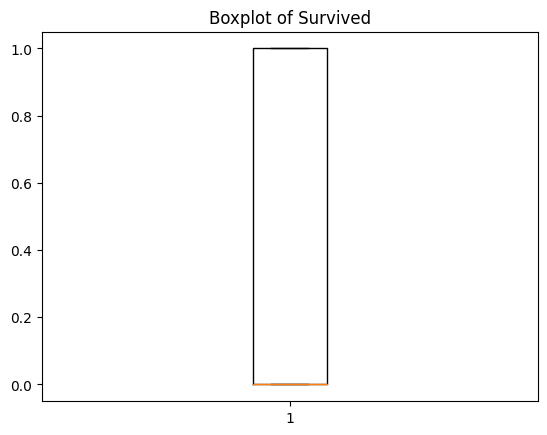

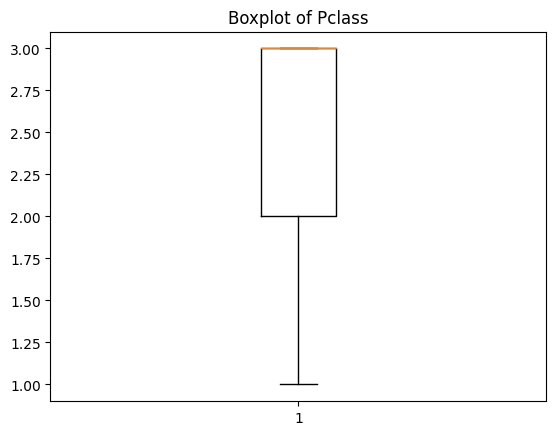

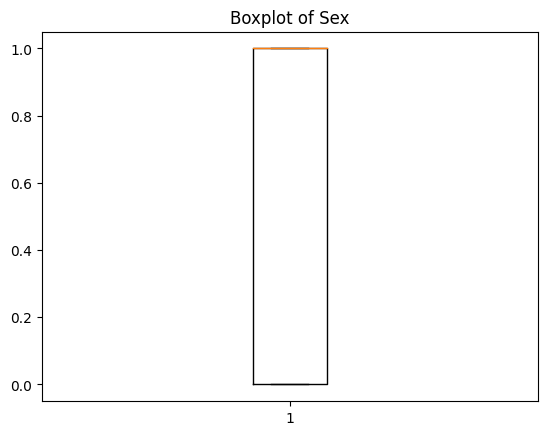

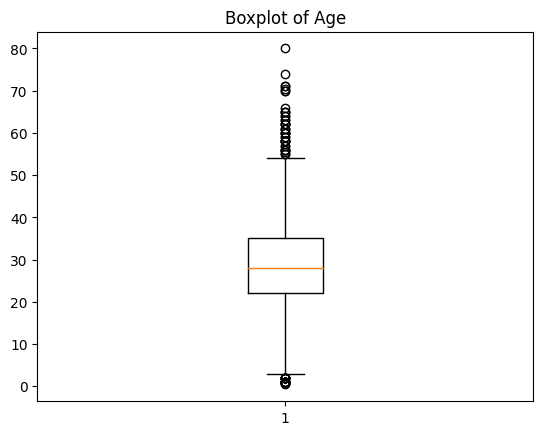

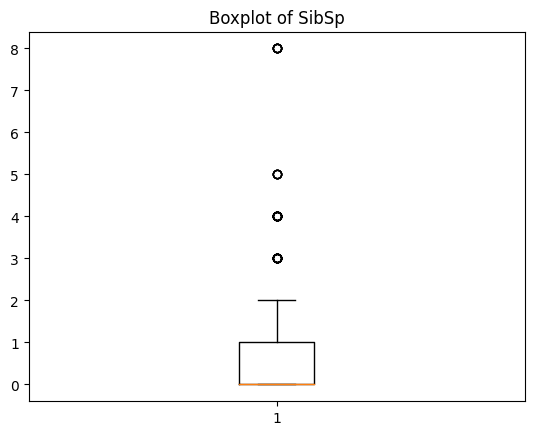

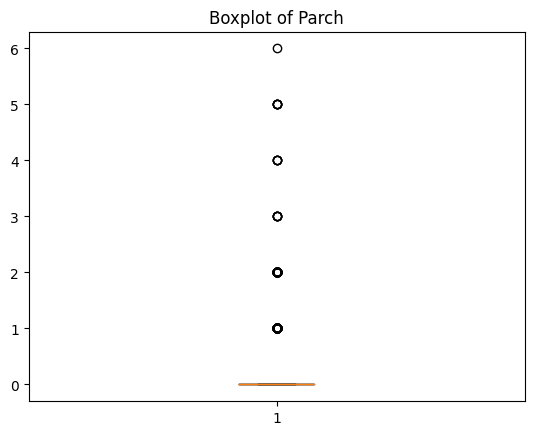

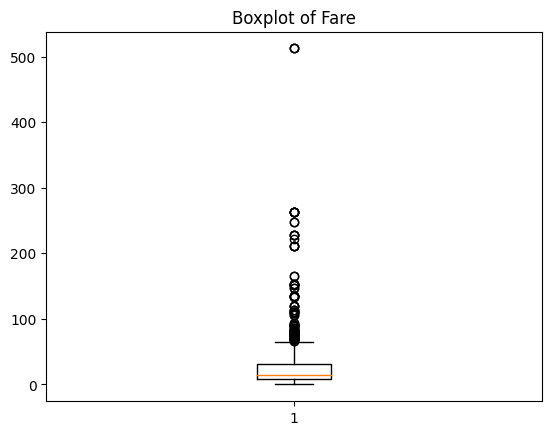

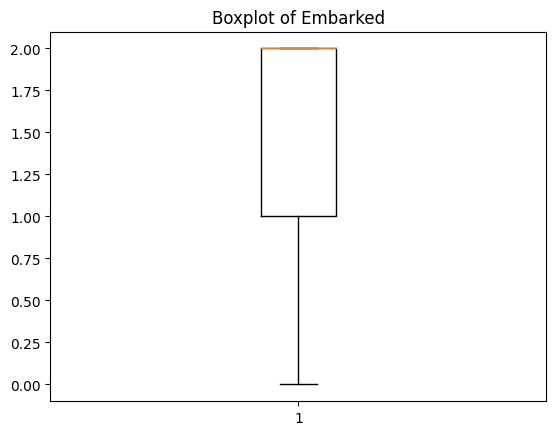

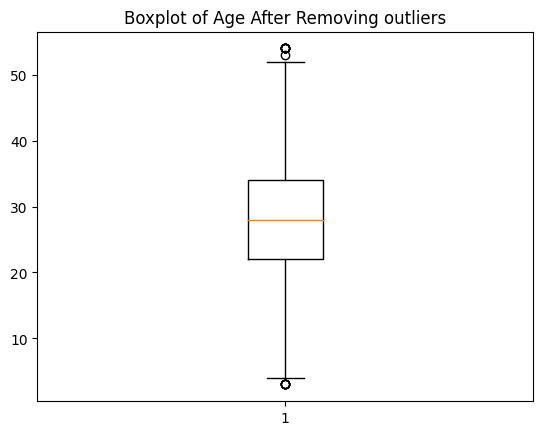

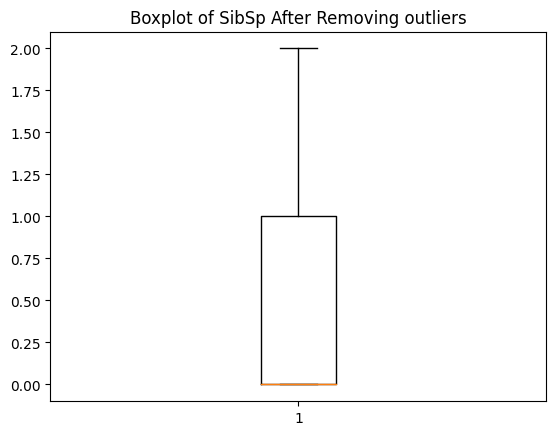

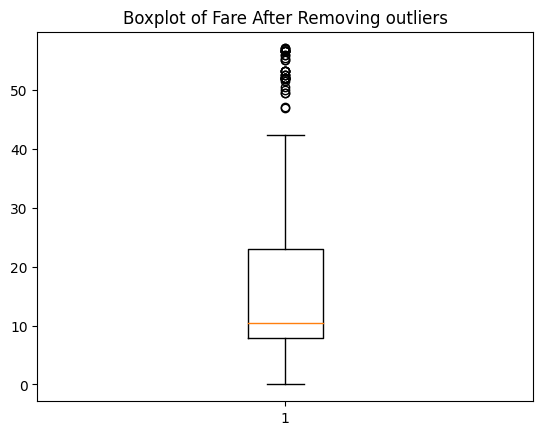


Histograms:


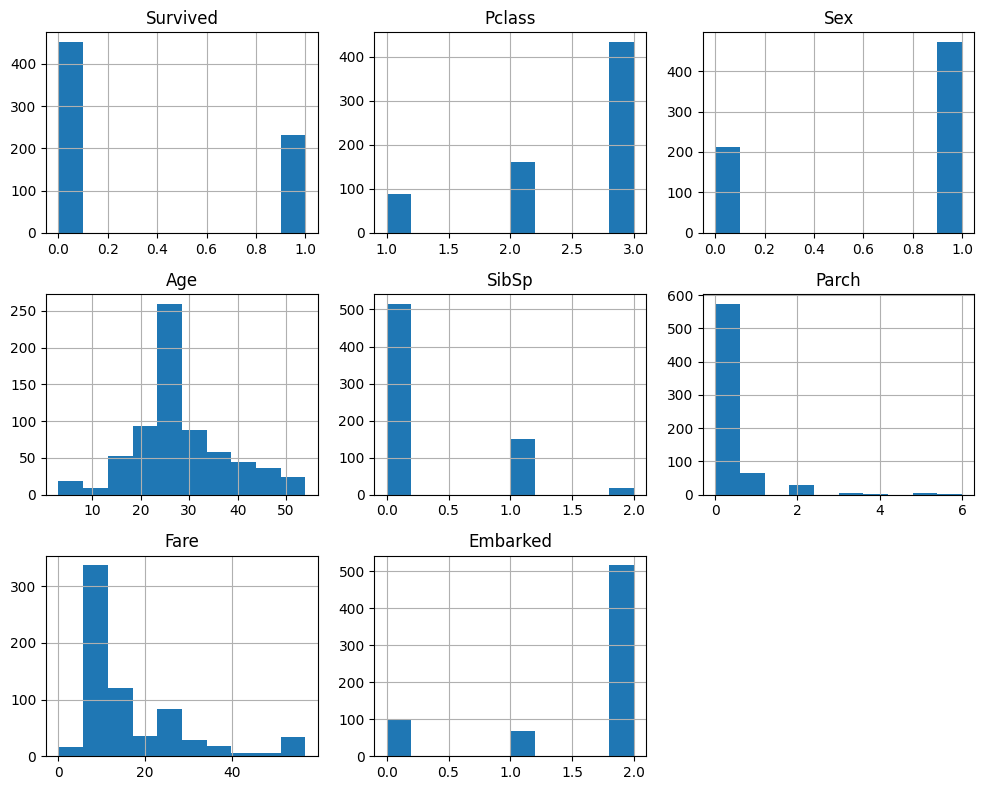

SVM Model Metrics:
Accuracy: 0.7017543859649122
Precision: 0.7404540763673891
Recall: 0.7017543859649122
F1 Score: 0.644619210862405
ROC AUC: 0.804159318048207

Random Forest Model Metrics:
Accuracy: 0.6432748538011696
Precision: 0.6252401763176733
Recall: 0.6432748538011696
F1 Score: 0.626023798809013
ROC AUC: 0.6538800705467372

Correlation Heatmap:


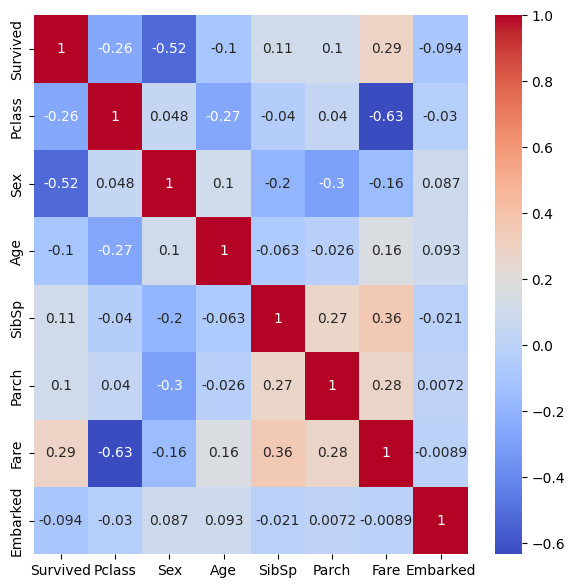

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
import sklearn.metrics as metrics
from sklearn.preprocessing import LabelEncoder

def perform_eda(filepath):
    # Load the dataset into a pandas DataFrame
    try:
        df = pd.read_csv(filepath,encoding='iso-8859-1')
    except FileNotFoundError:
        print(f"Error: File '{filepath}' not found.")
        return

    # Display the first few rows of the dataset
    print("Preview of the dataset:")
    print(df.head())

    # Get basic information about the dataset
    print("\nDataset Information:")
    print(df.info())

    
    # Summary statistics of numerical columns
    print("\nSummary Statistics:")
    print(df.describe())

    # Data preprocessing
    # Drop unnecessary columns and handle missing values
    df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

    # Convert categorical features to numerical using label encoding
    label_encoder = LabelEncoder()
    df['Sex'] = label_encoder.fit_transform(df['Sex'])
    df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

    # Identify missing values
    print("\nMissing Values:")
    print(df.isnull().sum())
    # Handle missing values
    if df.isnull().values.any():
        imputer = SimpleImputer(strategy='mean')
        df = imputer.fit_transform(df)
    
    # Identify outliers
    # Create a boxplot for each column
    for column in df:
        plt.boxplot(df[column])
        plt.title('Boxplot of '+column)
        # Display the boxplots
        plt.show()
    # Handle outliers
    
    # Calculate the interquartile range
    q1 = df['Age'].quantile(0.25)
    q3 = df['Age'].quantile(0.75)
    iqr = q3 - q1
    # Identify the outliers
    outliers = df['Age'].loc[(df['Age'] < q1 - 1.5 * iqr) | (df['Age'] > q3 + 1.5 * iqr)]
    # Remove the outliers
    df = df.loc[~df['Age'].isin(outliers)]

       # Creating boxplot to check if outliers still exist for the column
    plt.boxplot(df['Age'])
    plt.title('Boxplot of Age After Removing outliers')
    # Display the boxplots
    plt.show()

    #removing outliers of SibSp
    # Calculate the interquartile range
    q1 = df['SibSp'].quantile(0.25)
    q3 = df['SibSp'].quantile(0.75)
    iqr = q3 - q1
    # Identify the outliers
    outliers = df['SibSp'].loc[(df['SibSp'] < q1 - 1.5 * iqr) | (df['SibSp'] > q3 + 1.5 * iqr)]
    # Remove the outliers
    df = df.loc[~df['SibSp'].isin(outliers)]

       # Creating boxplot to check if outliers still exist for the column
    plt.boxplot(df['SibSp'])
    plt.title('Boxplot of SibSp After Removing outliers')
    # Display the boxplots
    plt.show()

    #removing outliers of Fare
    # Calculate the interquartile range
    q1 = df['Fare'].quantile(0.25)
    q3 = df['Fare'].quantile(0.75)
    iqr = q3 - q1
    # Identify the outliers
    outliers = df['Fare'].loc[(df['Fare'] < q1 - 1.5 * iqr) | (df['Fare'] > q3 + 1.5 * iqr)]
    # Remove the outliers
    df = df.loc[~df['Fare'].isin(outliers)]

       # Creating boxplot to check if outliers still exist for the column
    plt.boxplot(df['Fare'])
    plt.title('Boxplot of Fare After Removing outliers')
    # Display the boxplots
    plt.show()
    
    

    # Visualize the distribution of numerical features using histograms
    print("\nHistograms:")
    df.hist(figsize=(10, 8))
    plt.tight_layout()
    plt.show()


    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', axis=1), df['Survived'], test_size=0.25)

    # Create and optimize the Support Vector Machine (SVM) model
    svm_model = SVC(random_state=42, probability=True)

    # Feature selection using Recursive Feature Elimination (RFE) for Random Forest
    random_forest_model = RandomForestClassifier(random_state=42)
    rfe = RFE(random_forest_model, n_features_to_select=2)  # Select the top 2 features
    rfe.fit(X_train, y_train)

    # Get the selected features from RFE
    selected_features = X_train.columns[rfe.support_]

    # Train the Random Forest model with selected features
    random_forest_model.fit(X_train[selected_features], y_train)

    # Evaluate the SVM model
    svm_model.fit(X_train, y_train)
    svm_predictions = svm_model.predict(X_test)
    svm_accuracy = metrics.accuracy_score(y_test, svm_predictions)
    svm_precision = metrics.precision_score(y_test, svm_predictions, average='weighted')
    svm_recall = metrics.recall_score(y_test, svm_predictions, average='weighted')
    svm_f1_score = metrics.f1_score(y_test, svm_predictions, average='weighted')
    svm_roc_auc = metrics.roc_auc_score(pd.get_dummies(y_test), svm_model.predict_proba(X_test), multi_class='ovr', average='weighted')

    # Evaluate the Random Forest model
    random_forest_predictions = random_forest_model.predict(X_test[selected_features])
    random_forest_accuracy = metrics.accuracy_score(y_test, random_forest_predictions)
    random_forest_precision = metrics.precision_score(y_test, random_forest_predictions, average='weighted')
    random_forest_recall = metrics.recall_score(y_test, random_forest_predictions, average='weighted')
    random_forest_f1_score = metrics.f1_score(y_test, random_forest_predictions, average='weighted')
    random_forest_roc_auc = metrics.roc_auc_score(pd.get_dummies(y_test), random_forest_model.predict_proba(X_test[selected_features]), multi_class='ovr', average='weighted')

    # Print the evaluation metrics for both models
    print("SVM Model Metrics:")
    print("Accuracy:", svm_accuracy)
    print("Precision:", svm_precision)
    print("Recall:", svm_recall)
    print("F1 Score:", svm_f1_score)
    print("ROC AUC:", svm_roc_auc)

    print("\nRandom Forest Model Metrics:")
    print("Accuracy:", random_forest_accuracy)
    print("Precision:", random_forest_precision)
    print("Recall:", random_forest_recall)
    print("F1 Score:", random_forest_f1_score)
    print("ROC AUC:", random_forest_roc_auc)


    # Visualize categorical features
    categorical_features = df.select_dtypes(include=["object"]).columns
    for feature in categorical_features:
        print(f"\nValue counts for {feature}:")
        print(df[feature].value_counts())
        sns.countplot(x=feature, data=df)
        plt.xticks(rotation=45)
        plt.show()

    #Visualize the correlation between numerical features using a heatmap
    print("\nCorrelation Heatmap:")
    correlation_matrix = df.corr()
    plt.figure(figsize=(7, 7))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

if __name__ == "__main__":
    # Replace 'UberDataset.csv' with the actual file name and path
    file_path = r'D:\Python_Programming_for_BigData\Assignment10\titanic.csv'
    perform_eda(file_path)